## Dates and Times

**Datetime variables** can contain **dates** only, **time** only, or **date and time**. They are **categorical** in the case of **date of birth** ('29-08-1987'), or **date of application** ('2016-Dec'). Datetime variable is usually in **raw format**. We should extract much more information by preprocessing them correctly.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv('loan.csv')
data.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN


In [16]:
data[['date_issued', 'date_last_payment']].dtypes

date_issued          object
date_last_payment    object
dtype: object

Their types are **objects**. Pandas treats them as **categorical variables**.They should be **re-casted** (parsed) into **datetime format**.

In [17]:
data['date_issued_dt'] = pd.to_datetime(data['date_issued'])
data['date_last_payment_dt'] = pd.to_datetime(data['date_last_payment'])
data[['date_issued', 'date_issued_dt', 'date_last_payment', 'date_last_payment_dt']].head()

,date_issued,date_issued_dt,date_last_payment,date_last_payment_dt
0,2013-06-11,2013-06-11,2016-01-14,2016-01-14
1,2014-05-08,2014-05-08,2016-01-25,2016-01-25
2,2013-10-26,2013-10-26,2014-09-26,2014-09-26
3,2015-08-20,2015-08-20,2016-01-26,2016-01-26
4,2014-07-22,2014-07-22,2016-01-11,2016-01-11


**Let's extract the month and the year to make nicer plots!**

In [19]:
data['month'] = data['date_issued_dt'].dt.month
data['year'] = data['date_issued_dt'].dt.year
data.head().T

,0,1,2,3,4
customer_id,0,1,2,3,4
disbursed_amount,23201.5,7425.0,11150.0,7600.0,31960.0
interest,15.484,11.2032,8.51,5.8656,18.7392
market,C,B,A,A,E
employment,Teacher,Accountant,Statistician,Other,Bus driver
time_employed,<=5 years,<=5 years,<=5 years,<=5 years,>5 years
householder,RENT,OWNER,RENT,RENT,RENT
income,84600.0,102000.0,69840.0,100386.0,95040.0
date_issued,2013-06-11,2014-05-08,2013-10-26,2015-08-20,2014-07-22
target,0,0,0,0,0


**How much money Lending has disbursed over the years to the different risk markets (grade variable) !**

Text(0, 0.5, 'Disbursed Amount')

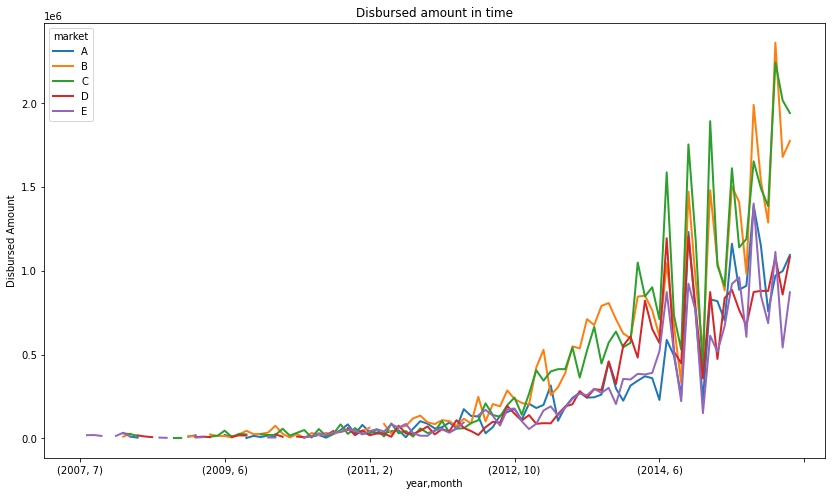

In [22]:
fig = data.groupby(['year','month', 'market'])['disbursed_amount'].sum().unstack().plot(
    figsize=(14, 8), linewidth=2)
fig.set_title('Disbursed amount in time')
fig.set_ylabel('Disbursed Amount')

This toy finance company seems to have increased the amount of money lent from 2012 onwards. **The tendency indicates that they continue to grow**. In addition, we can see that their major business comes from lending money to C and B grades. **'A' grades are the lower risk borrowers**, borrowers that most likely will be able to repay their loans, as they are typically in a better financial situation. Borrowers within this grade are charged lower interest rates. **D and E grades represent the riskier borrowers**. Usually borrowers in somewhat tighter financial situations, or for whom there is not sufficient financial history to make a reliable credit assessment. They are typically charged higher rates, as the business, and therefore the investors, take a higher risk when lending them money.